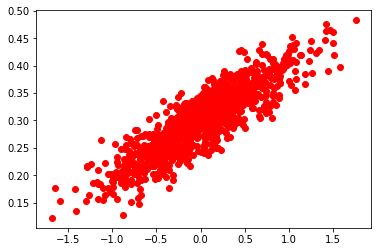

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


0 [-0.2391739] [0.29624724]
0 0.03355533


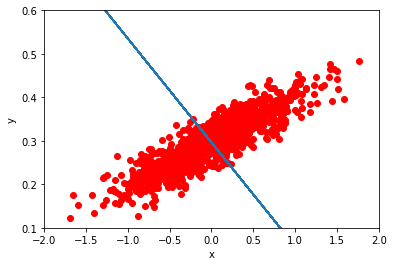

1 [-0.14282706] [0.29704654]
1 0.017621597


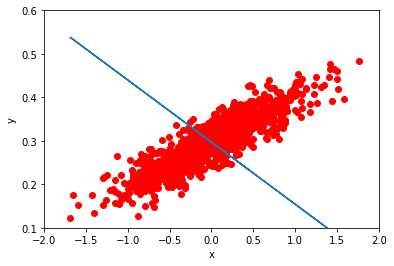

2 [-0.07380652] [0.29762998]
2 0.009444477


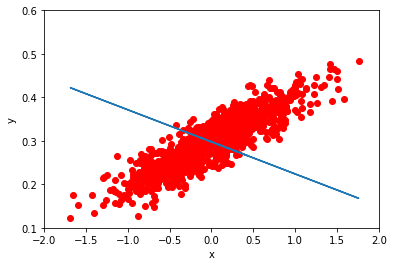

3 [-0.02436181] [0.29804793]
3 0.0052480153


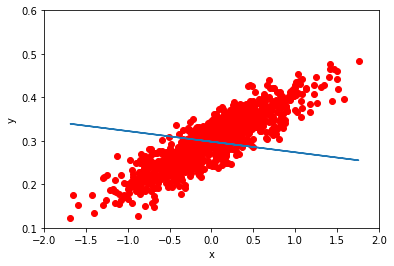

4 [0.01105923] [0.29834735]
4 0.0030944094


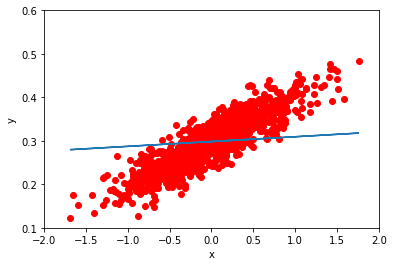

5 [0.03643404] [0.29856187]
5 0.0019891884


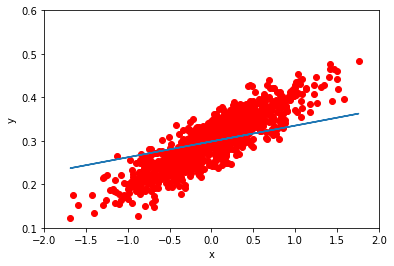

6 [0.05461196] [0.29871553]
6 0.001421994


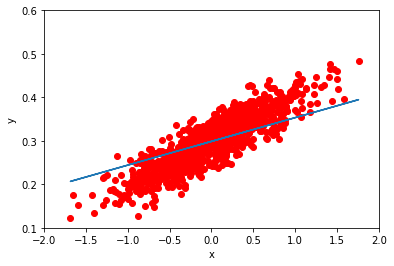

7 [0.0676342] [0.2988256]
7 0.0011309123


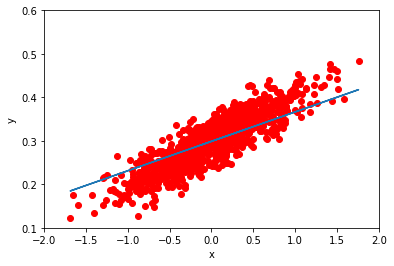

In [1]:
# 코드 설명

# 회귀분석
import numpy as np # numpy를 불러온다

num_points = 1000 # dataset은 1000개
vectors_set = []

for i in range(num_points): # 1000개 데이터를 가져오는데
    x1 = np.random.normal(0.0, 0.55) # x값은 정규분포 0.0, 0.55에서 1000개를 가져오라
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03) # 함수는 다음과 같고, 뒤에 np.random.normal(0.0, 0.03)은 편향 bias를 의미한다. 정규분포 0.0, 0.03에서 뽑아와서 편향성을 집어넣는다.
    vectors_set.append([x1, y1]) # x1과 y1을 합친다. 그래서 벡터를 만든다.
    
x_data = [v[0] for v in vectors_set] 
y_data = [v[1] for v in vectors_set] 

import matplotlib.pyplot as plt # matplotlib으로 시각화를 한다.
%matplotlib inline 
# jupyer notebook에서는 이 말이 있어야 된다!

# 그래픽 표시
plt.plot(x_data, y_data, 'ro')
plt.show()

import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # W, 회귀분석 공부할때는 B1 베타원
b = tf.Variable(tf.zeros([1])) # 편향 b bias를 말한다
y = W * x_data + b # 회귀분석 공식

loss = tf.reduce_mean(tf.square(y - y_data)) # 비용함수, 오차함수, 회귀분석에서는 MSE Mean Square Errors
optimizer = tf.train.GradientDescentOptimizer(0.5) # 최적화이론을 적용하는데, Gradient Descent를 0.5 학습속도로 적용해서 실핸한다

train = optimizer.minimize(loss) # 비용함수를 최소화시키도록 트레이닝 시킨다

init = tf.global_variables_initializer() # 초기화

sess = tf.Session() # sess
sess.run(init) # 고고씽!

for step in range(8): # 8번 훈련시킨다
    sess.run(train)
    print (step, sess.run(W), sess.run(b)) # 훈련단계 각각마다 그 결과값인 W와 b를 출력시킨다
    print (step, sess.run(loss)) # 오차함수도 출력시키고
    
    # 그래픽 표시
    plt.plot(x_data, y_data, 'ro') # 그래프에 이러한 데이터를 넣고요
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b)) # 그래프 식은 이렇다
    plt.xlim(-2, 2) # x축의 범위는 -2에서 2이다
    plt.ylim(0.1, 0.6) # y축의 범위는 0.1에서 0.6이다
    plt.xlabel('x') # x축의 이름은 x이다
    plt.ylabel('y') # y축의 이름은 y이다
    plt.show() # 그래프를 보여줘요!